In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

df1 = pd.read_csv(city_data_to_load)
df2 = pd.read_csv(ride_data_to_load)


df1.head()
df2.head()
# Combine the data into a single dataset
df3 = pd.merge(df1, df2, on = "city")
# Display the data table for preview
df3.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


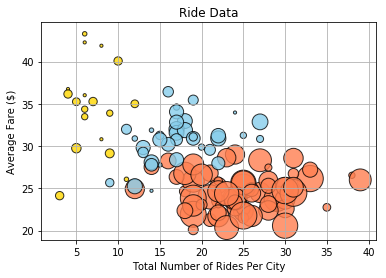

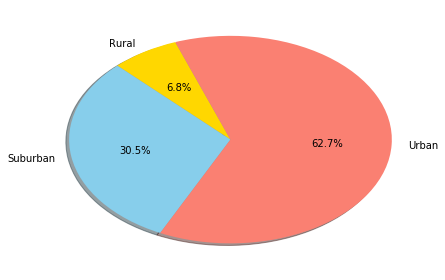

([<matplotlib.patches.Wedge at 0x1e909b9e1d0>,
 [Text(1.085,0.181054,'Rural'),
  Text(0.441865,1.00735,'Suburban'),
  Text(-0.601643,-0.920883,'Urban')],
 [Text(0.591817,0.0987568,'5.3%'),
  Text(0.241017,0.549464,'26.3%'),
  Text(-0.328169,-0.5023,'68.4%')])

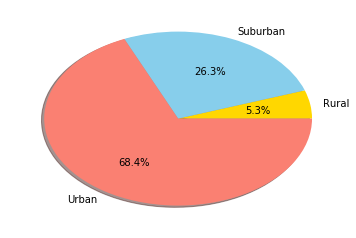

In [4]:
#define city type
urban = df3[df3["type"] == "Urban"]
suburban = df3[df3["type"] == "Suburban"]
rural = df3[df3["type"] == "Rural"]

#group city type
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]
urban_avg_count = urban.groupby(["city"]).mean()["fare"]
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban.groupby(["city"]).count()["ride_id"]
suburban_avg_count = suburban.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
rural_avg_count = rural.groupby(["city"]).mean()["fare"]
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]
# Plot the necessary information 
plt.scatter(urban_ride_count,urban_avg_count,
          s=10*urban_driver_count, c = "coral",
           edgecolors = "k", marker = "o",
           linewidth  = 1, alpha = 0.8)

plt.scatter(suburban_ride_count,suburban_avg_count,
          s=10*suburban_driver_count, c = "skyblue",
           edgecolors = "k", marker = "o",
           linewidth  = 1, alpha = 0.8)

plt.scatter(rural_ride_count,rural_avg_count,
          s=10*rural_driver_count, c = "gold",
           edgecolors = "k", marker = "o",
           linewidth  = 1, alpha = 0.8)
plt.grid(True)

#axis.legend = ['Urban','Suburban', "Rural"]

plt.title("Ride Data")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
# Total Fares by City Type
plt.figure()
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold","skyblue", "salmon"]

fares = 100*df3.groupby(["type"]).sum()["fare"]/df3["fare"].sum()
plt.pie(fares, labels=labels,colors=colors, autopct='%1.1f%%', startangle= 110,shadow=True)


plt.tight_layout()
plt.show()

# Total Rides by City Type
plt.figure()

rides = 100*df3.groupby(['type']).count()['driver_count']/df3["driver_count"].count()

plt.pie(rides, labels=labels,colors=colors, autopct='%1.1f%%',
       shadow=True)

In [18]:
#Total driver count.

city_drivers_pie = df3.groupby(["type"])["driver_count"].mean()
city_drivers_pie



type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [20]:
#Use the City Pie index for the wedge labels.
city_drivers_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

In [40]:
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#explode the first and second segments of the pie chart.

explode = (0.05,0.05,0)

#Sum of fares by city type.

city_fare_pie = df3.groupby(["type"])["fare"].sum()
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

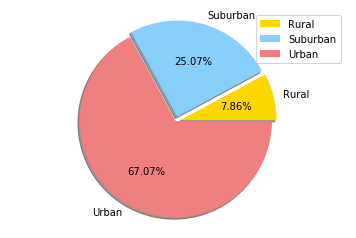

In [41]:
#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the pie chart.
plt.show()

1- Urban cities have the highest percentage of total fares at 68.4% along with the total driver count at 67.07%.
2- Based on the bubble plot there are more number of riders & drivers in urban cities than the other two city types.
3- Eventhough Rural cities had the least percent of total fares at 6.8%, the still had the highest avg fare per city.
